# PHOEBE G/F SpT Physical Grid

Code for generating grid of G/F spectral type stars to see the impact on eclipse width, depth as well as the impact on measured colour.
Go to 22/01/2026 in Notebook for notes.

## Import dependances

In [1]:
import phoebe as phb, numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.interpolate import UnivariateSpline

import sys
sys.path.append('../')
from Functions.phoebeCustom import saveSimulation, normaliseFluxes

## Initalise Binary

Initialise PHOEBE with the default binary + warnings

In [2]:
logger = phb.logger('error')
bSystem = phb.default_binary()

## Control Elements

These should stay the same as they shouldn't have any impact on the lightcurve.

In [3]:
period = 10
times = phb.linspace(0, period, 2001)

In [4]:
bSystem['period@binary'] = period
bSystem['distance@system'] = 10 * u.astrophys.pc
print(bSystem['distance@system'])

Parameter: distance@system
                       Qualifier: distance
                     Description: Distance to the system
                           Value: 3.085677581491367e+17 m
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [5]:
bSystem.flip_constraint('mass@primary', 'sma@binary')
bSystem['mass@primary@component'] = 1
bSystem['teff@primary'] = 5780 

### Light Curve Datasets

Create the light curve datasets to be used in the simulation.

First, check installed passbands and install any needed.

In [6]:
print(phb.list_installed_passbands())
# phb.install_passband('johnson_b.fits', local=False)

['Bolometric:900-40000', 'Johnson:B', 'Johnson:V']


In [7]:
passbands = ['Johnson:B', 'Johnson:V']

for passband in passbands:
    bSystem.add_dataset(
        'lc', 
        times = times,
        passband=passband,
        dataset=f'lc_{passband[-1]}',
        overwrite=True
    )

bSystem.set_value_all('pblum_mode', 'absolute')
print('Datasets created.')

Datasets created.


## Parameter space initialisaton

Initialise the parameter space for all spectral types

In [8]:
spT = ['K4', 'K3', 'K2', 'K1', 'K0', 'G9', 'G8', 'G7', 'G6', 'G5', 'G4', 'G3', 'G2', 'G1', 'G0', 'F9', 'F8', 'F7', 'F6', 'F5'] # Spectral type
masses = [0.73, 0.78, 0.82, 0.86, 0.88, 0.90, 0.94, 0.95, 0.97, 0.98, 0.985, 0.99, 1.00, 1.03, 1.06, 1.13, 1.18, 1.21, 1.25, 1.33] # In solar masses
radii = [0.713, 0.755, 0.783, 0.797, 0.813, 0.853, 0.914, 0.927, 0.949, 0.977, 0.991, 1.002, 1.012, 1.060, 1.100, 1.167, 1.221, 1.324, 1.359, 1.473] # In solar radius
teff = [4.60, 4.83, 5.10, 5.17, 5.27, 5.38, 5.48, 5.55, 5.60, 5.66, 5.68, 5.72, 5.78, 5.86, 5.93, 6.05, 6.18, 6.28, 6.35, 6.55] # In kiloKelvin 

df = pd.DataFrame({'Spectral Type' : spT, 'Temperature' : teff, 'Radius' : radii, 'Mass' : masses})
df

,Spectral Type,Temperature,Radius,Mass
0,K4,4.60,0.713,0.730
1,K3,4.83,0.755,0.780
2,K2,5.10,0.783,0.820
3,K1,5.17,0.797,0.860
4,K0,5.27,0.813,0.880
5,G9,5.38,0.853,0.900
6,G8,5.48,0.914,0.940
7,G7,5.55,0.927,0.950
8,G6,5.60,0.949,0.970
9,G5,5.66,0.977,0.980


In [9]:
bSystem.flip_constraint('mass@secondary', 'q')

<ConstraintParameter: {q@binary@component} = {mass@secondary@component} / {mass@primary@component} (solar units) => 0.9999999999999996>

## Simulation (Single)

In [ ]:
for temp, radius, mass, spectral in zip(teff, radii, masses, spT):
    bSystem['component@secondary@teff'] = temp * 1e3
    bSystem['component@secondary@requiv'] = radius
    bSystem['component@secondary@mass'] = mass
    print(f'\nStar: {spectral} | Teff: {temp} | Radius: {radius} | Mass: {mass}')
    bSystem.run_compute(
        distortion_method = 'rotstar',
        model = spectral, # Name of model is the spectral type
        overwrite = True
    )


Star: K4 | Teff: 4.6 | Radius: 0.713 | Mass: 0.73


100%|██████████| 2001/2001 [00:09<00:00, 201.79it/s]



Star: K3 | Teff: 4.83 | Radius: 0.755 | Mass: 0.78


100%|██████████| 2001/2001 [00:10<00:00, 198.10it/s]



Star: K2 | Teff: 5.1 | Radius: 0.783 | Mass: 0.82


100%|██████████| 2001/2001 [00:10<00:00, 196.34it/s]



Star: K1 | Teff: 5.17 | Radius: 0.797 | Mass: 0.86


100%|██████████| 2001/2001 [00:10<00:00, 184.04it/s]



Star: K0 | Teff: 5.27 | Radius: 0.813 | Mass: 0.88


100%|██████████| 2001/2001 [00:09<00:00, 200.82it/s]



Star: G9 | Teff: 5.38 | Radius: 0.853 | Mass: 0.9


100%|██████████| 2001/2001 [00:10<00:00, 196.17it/s]



Star: G8 | Teff: 5.48 | Radius: 0.914 | Mass: 0.94


100%|██████████| 2001/2001 [00:10<00:00, 186.45it/s]



Star: G7 | Teff: 5.55 | Radius: 0.927 | Mass: 0.95


100%|██████████| 2001/2001 [00:10<00:00, 199.00it/s]



Star: G6 | Teff: 5.6 | Radius: 0.949 | Mass: 0.97


100%|██████████| 2001/2001 [00:10<00:00, 196.91it/s]



Star: G5 | Teff: 5.66 | Radius: 0.977 | Mass: 0.98


100%|██████████| 2001/2001 [00:10<00:00, 192.12it/s]



Star: G4 | Teff: 5.68 | Radius: 0.991 | Mass: 0.985


100%|██████████| 2001/2001 [00:10<00:00, 196.35it/s]



Star: G3 | Teff: 5.72 | Radius: 1.002 | Mass: 0.99


100%|██████████| 2001/2001 [00:10<00:00, 187.67it/s]



Star: G2 | Teff: 5.78 | Radius: 1.012 | Mass: 1.0


100%|██████████| 2001/2001 [00:10<00:00, 194.98it/s]



Star: G1 | Teff: 5.86 | Radius: 1.06 | Mass: 1.03


100%|██████████| 2001/2001 [00:10<00:00, 197.82it/s]



Star: G0 | Teff: 5.93 | Radius: 1.1 | Mass: 1.06


100%|██████████| 2001/2001 [00:10<00:00, 186.04it/s]



Star: F9 | Teff: 6.05 | Radius: 1.167 | Mass: 1.13


100%|██████████| 2001/2001 [00:10<00:00, 185.89it/s]



Star: F8 | Teff: 6.18 | Radius: 1.221 | Mass: 1.18


100%|██████████| 2001/2001 [00:10<00:00, 188.33it/s]



Star: F7 | Teff: 6.28 | Radius: 1.324 | Mass: 1.21


100%|██████████| 2001/2001 [00:10<00:00, 186.49it/s]



Star: F6 | Teff: 6.35 | Radius: 1.359 | Mass: 1.25


100%|██████████| 2001/2001 [00:10<00:00, 188.21it/s]



Star: F5 | Teff: 6.55 | Radius: 1.473 | Mass: 1.33


100%|██████████| 2001/2001 [00:10<00:00, 192.67it/s]


In [11]:
bSystem.save('gridPhysical.phoebe', compact=True)

'gridPhysical.phoebe'

## Analysis & Plotting

### Load Data (if needed)

In [ ]:
bSystem = phb.Bundle.open('gridPhysical.phoebe')

In [ ]:
passbands = ['Johnson:B', 'Johnson:V']
spT = ['K4', 'K3', 'K2', 'K1', 'K0', 'G9', 'G8', 'G7', 'G6', 'G5', 'G4', 'G3', 'G2', 'G1', 'G0', 'F9', 'F8', 'F7', 'F6', 'F5'] # Spectral type
masses = [0.73, 0.78, 0.82, 0.86, 0.88, 0.90, 0.94, 0.95, 0.97, 0.98, 0.985, 0.99, 1.00, 1.03, 1.06, 1.13, 1.18, 1.21, 1.25, 1.33] # In solar masses
radii = [0.713, 0.755, 0.783, 0.797, 0.813, 0.853, 0.914, 0.927, 0.949, 0.977, 0.991, 1.002, 1.012, 1.060, 1.100, 1.167, 1.221, 1.324, 1.359, 1.473] # In solar radius
teff = [4.60, 4.83, 5.10, 5.17, 5.27, 5.38, 5.48, 5.55, 5.60, 5.66, 5.68, 5.72, 5.78, 5.86, 5.93, 6.05, 6.18, 6.28, 6.35, 6.55] # In kiloKelvin 

df = pd.DataFrame({'Spectral Type' : spT, 'Temperature' : teff, 'Radius' : radii, 'Mass' : masses})
df

### Analysis

In [12]:
bSystemNormalised = normaliseFluxes(bSystem) # Normalise fluxes for analysis

In [13]:
# Loop over passbands first
prim_time = times[:400]
sec_time = times[800:1200]

for passband in passbands:
    prim_depth = []
    sec_depth = []
    prim_fwhm = []
    sec_fwhm = []
    
    # Loop over spectral types
    for modelname in bSystemNormalised.models:
        model = bSystemNormalised[f'{modelname}@lc_{passband[-1]}']
        
        # ----------------------------------------------------------
        # Calculate Eclipse Depth
        prim_flux = np.array(model['fluxes'].get_value()[:400])
        sec_flux = np.array(model['fluxes'].get_value()[800:1200])
        
        # As synthetic, no variation when stars are not eclipsing, so safe to assume depth = max - min
        prim_mag = np.ptp(prim_flux) - 0.5 
        sec_mag = np.ptp(sec_flux) - 0.5
        
        prim_depth.append(prim_mag)
        sec_depth.append(sec_mag)
        
        # ----------------------------------------------------------
        # Calculate Eclipse Width (using FWHM via interpolation)
        
        spline = UnivariateSpline(prim_time, -prim_flux+1 - (1-np.min(prim_flux))/2, s=0)
        r1 = spline.roots()    
        prim_fwhm.append(r1[0] * 2)
        
        spline = UnivariateSpline(sec_time, -sec_flux+1 - (1-np.min(sec_flux))/2, s=0)
        r1, r2 = spline.roots()
        sec_fwhm.append(abs(r2 - r1)) 
        
    df[f'{passband[-1]} Primary Depth'] = prim_depth
    df[f'{passband[-1]} Secondary Depth'] = sec_depth
    df[f'{passband[-1]} Primary Width'] = prim_fwhm
    df[f'{passband[-1]} Secondary Width'] = sec_fwhm

df

,Spectral Type,Temperature,Radius,Mass,B Primary Depth,B Secondary Depth,B Primary Width,B Secondary Width,V Primary Depth,V Secondary Depth,V Primary Width,V Secondary Width
0,K4,4.60,0.713,0.730,0.061490,-0.411032,0.108927,0.126174,0.021922,-0.379009,0.111587,0.125739
1,K3,4.83,0.755,0.780,0.083616,-0.359292,0.107727,0.123817,0.040962,-0.323773,0.110053,0.123289
2,K2,5.10,0.783,0.820,0.070442,-0.290988,0.106949,0.121904,0.029581,-0.257422,0.109022,0.121349
3,K1,5.17,0.797,0.860,0.070162,-0.268266,0.106214,0.120553,0.030292,-0.235963,0.108145,0.119974
4,K0,5.27,0.813,0.880,0.063355,-0.235540,0.105899,0.119590,0.025967,-0.206160,0.107670,0.118986
5,G9,5.38,0.853,0.900,0.066871,-0.187383,0.105913,0.117756,0.033557,-0.162199,0.107243,0.117068
6,G8,5.48,0.914,0.940,0.070827,-0.127874,0.106397,0.114635,0.044152,-0.107594,0.106909,0.113824
7,G7,5.55,0.927,0.950,0.057012,-0.101635,0.106654,0.113898,0.035315,-0.085763,0.106958,0.113062
8,G6,5.60,0.949,0.970,0.048969,-0.076377,0.107110,0.112597,0.031934,-0.063784,0.107050,0.111711
9,G5,5.66,0.977,0.980,0.035441,-0.044953,0.108378,0.111201,0.024804,-0.036551,0.107813,0.110252


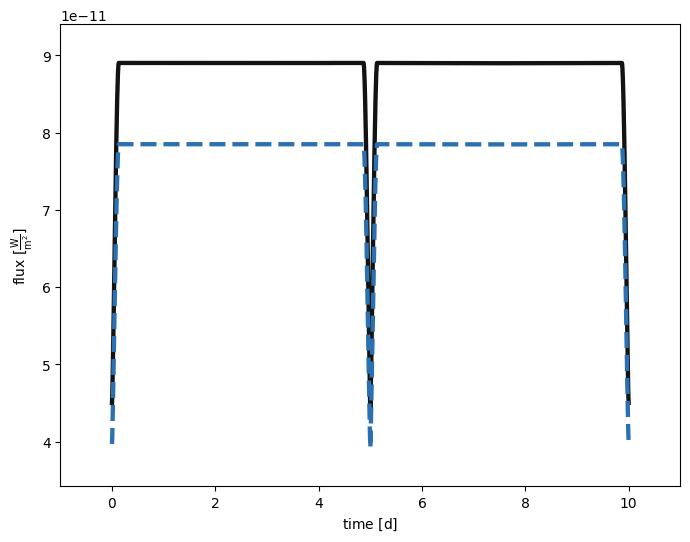

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [42]:
bSystem['G2@model'].plot(show=True)

[3.67752786e+13]
[3.54341538e+13]
[4.50258051e-11 4.58424773e-11 4.73082719e-11 ... 4.73054909e-11
 4.58406665e-11 4.50258051e-11]
ck2004
absolute
absolute
{'pblum@primary@lc_B': <Quantity 5.28375707e+25 W>, 'pblum@secondary@lc_B': <Quantity 2.42802618e+26 W>}


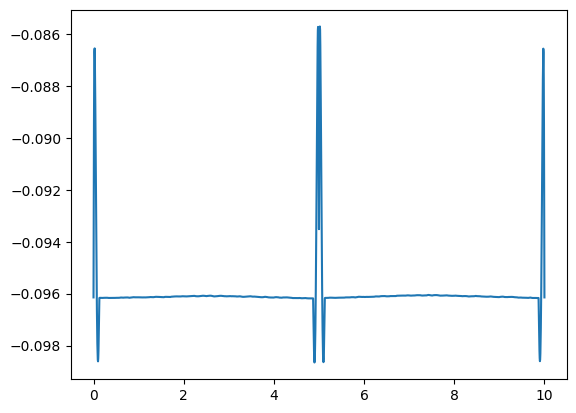

In [ ]:
f0_B = phb.get_passband('Johnson:B').Inorm()
f0_V = phb.get_passband('Johnson:V').Inorm()

flux_B = bSystem['fluxes@lc_B@G2'].get_value()
flux_V = bSystem['fluxes@lc_V@G2'].get_value()

print(f0_B)
print(f0_V)
print(flux_B)

mag_B = -2.5 * np.log10(flux_B / f0_B)
mag_V = -2.5 * np.log10(flux_V / f0_V)

BV_color = mag_B - mag_V

print(bSystem.get_value('atm@primary'))
print(bSystem.get_value('pblum_mode@lc_B'))
print(bSystem.get_value('pblum_mode@lc_V'))

print(bSystem.compute_pblums(dataset='lc_B', irrad_method='none'))

plt.plot(times, BV_color)
plt.show()
        

### Eclipse Depths

This gives us indication on the $T_\text{eff}$ of the binary stars, as well as some indication on $R$.

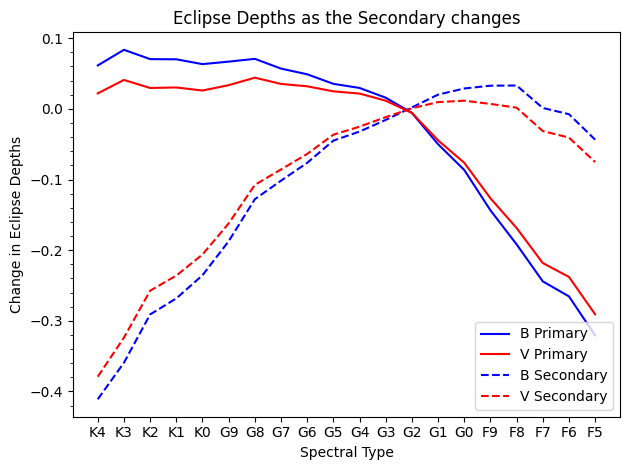

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(20), df['B Primary Depth'], c='blue', label='B Primary')
ax.plot(np.arange(20), df['V Primary Depth'], c='red', label='V Primary')
ax.plot(np.arange(20), df['B Secondary Depth'], c='blue', label='B Secondary', linestyle='dashed')
ax.plot(np.arange(20), df['V Secondary Depth'], c='red', label='V Secondary', linestyle='dashed')
ax.set_xticks(np.arange(20))
ax.minorticks_on()
ax.set_xticklabels(spT)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend(loc='lower right')
ax.set_title('Eclipse Depths as the Secondary changes')
ax.set_xlabel('Spectral Type')
ax.set_ylabel('Change in Eclipse Depths')
fig.tight_layout()
plt.show()

### Eclipse Widths

This does not give any indication on the $T_\text{eff}$ of the binary components, but gives good indication on $R$.

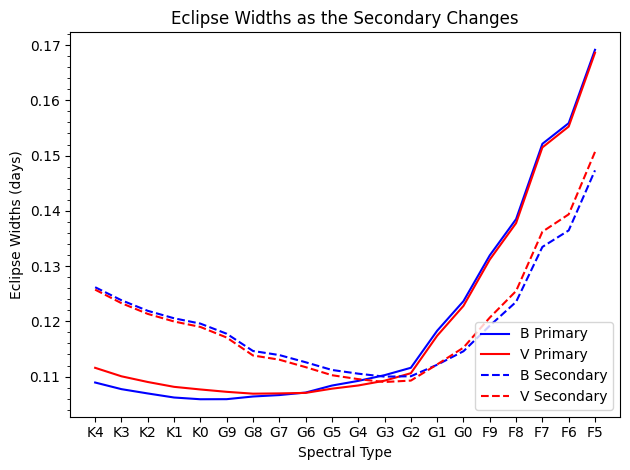

In [15]:
fig, ax = plt.subplots()
ax.plot(np.arange(20), df['B Primary Width'], c='blue', label='B Primary')
ax.plot(np.arange(20), df['V Primary Width'], c='red', label='V Primary')
ax.plot(np.arange(20), df['B Secondary Width'], c='blue', label='B Secondary', linestyle='dashed')
ax.plot(np.arange(20), df['V Secondary Width'], c='red', label='V Secondary', linestyle='dashed')
ax.set_xticks(np.arange(20))
ax.minorticks_on()
ax.set_xticklabels(spT)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend(loc='lower right')
ax.set_title('Eclipse Widths as the Secondary Changes')
ax.set_xlabel('Spectral Type')
ax.set_ylabel('Eclipse Widths (days)')
fig.tight_layout()
plt.show()